## Implementation of PCA Algorithm from Scratch and Evaluating Performance with Iris Data Set. Comparing the algorithm with Sklearn PCA Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

#### Step1: Define the PCA Algorithm 

In [2]:
class find_pca():
    
    def __init__(self,ncomponents):
        self.ncomponents = ncomponents
        
    
    def fit_pca(self, X):
        scale_method = StandardScaler()
        self.X_scaled = scale_method.fit_transform(X)
        
        cov_mat = np.cov(self.X_scaled, rowvar=False)
        
        eigval, eigvec = np.linalg.eig(cov_mat)
        
        eigval_idx = np.argsort(eigval*(-1))
        self.eigval_sorted = eigval[eigval_idx]
        self.eigvec_sorted = eigvec[:,eigval_idx]
        
    def transform_pca(self):
        n_prin_comps = self.eigvec_sorted[:,:self.ncomponents]
        transformed_data = self.X_scaled@n_prin_comps
        return transformed_data
             

#### Step2: Load Iris dataset with Scratch PCA and plot the features on a 2D space.

Text(0.5, 1.0, 'Manual PCA Code with IRIS Dataset')

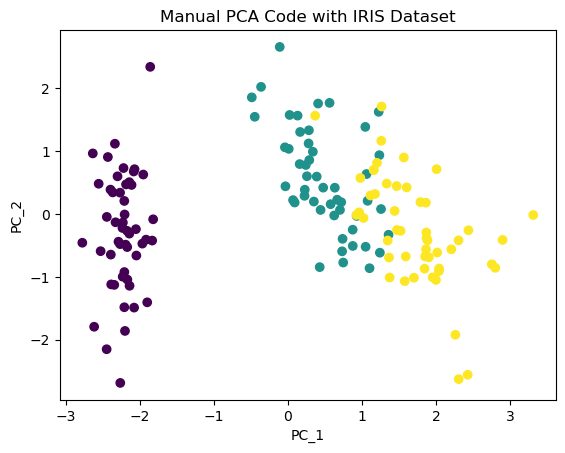

In [5]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data,columns=iris.feature_names)

iris_pca_manual = find_pca(ncomponents=2)
iris_pca_manual.fit_pca(iris_df)
iris_pca_manual_data = iris_pca_manual.transform_pca()

plt.scatter(iris_pca_manual_data[:,0], iris_pca_manual_data[:,1], c=iris.target)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('Manual PCA Code with IRIS Dataset')

#### Step3: Load Iris dataset with Sklearn PCA and plot the features on a 2D space.

Text(0.5, 1.0, 'Sklearn PCA Code with IRIS Dataset')

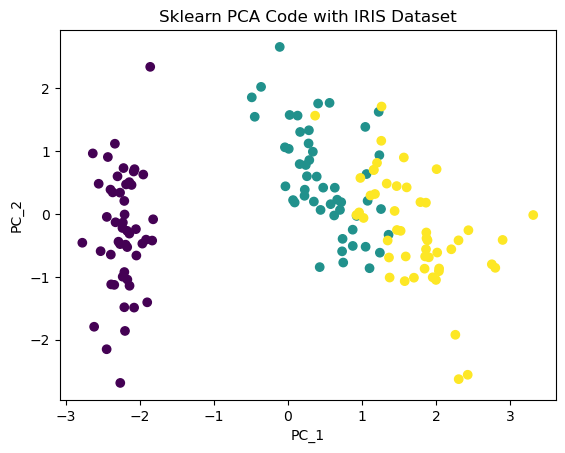

In [4]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data,columns=iris.feature_names)
iris_df_scaled = StandardScaler().fit_transform(iris_df)

iris_pca_sklearn = PCA(n_components=2)
iris_pca_sklearn_data = iris_pca_sklearn.fit_transform(iris_df_scaled)
iris_pca_sklearn_data = iris_pca_sklearn_data@[[1,0],[0,-1]]
plt.scatter(iris_pca_sklearn_data[:,0], iris_pca_sklearn_data[:,1], c=iris.target)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('Sklearn PCA Code with IRIS Dataset')